### CHURN PREDICTION USING  multi-layer perceptron (MLP) model

In [2]:
import pandas as pd
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### EDA

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df = data.drop(['customerID'],axis=1)

In [7]:
df.TotalCharges.dtype

dtype('O')

In [10]:
df[df.TotalCharges==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df = df[df.TotalCharges!=' ']

In [12]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

<Axes: xlabel='Churn', ylabel='count'>

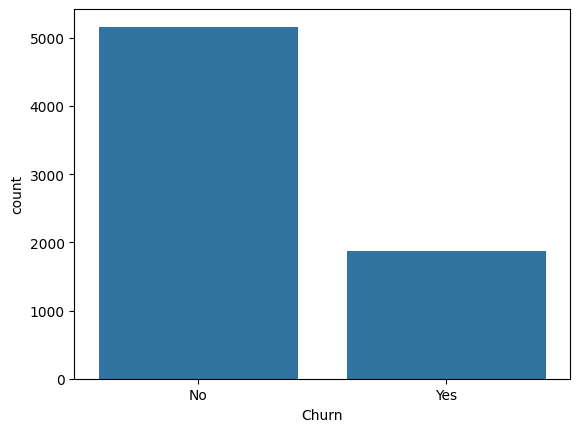

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='Churn')

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

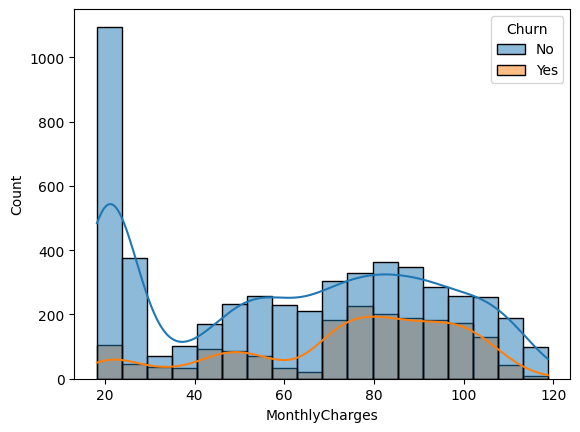

In [16]:
sns.histplot(data=data,x='MonthlyCharges',hue='Churn',kde=True)

<Axes: xlabel='TotalCharges', ylabel='Count'>

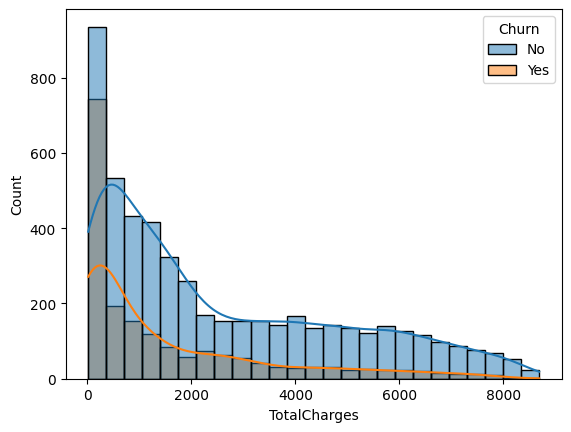

In [17]:
sns.histplot(x=df.TotalCharges,hue=df.Churn,kde=True)

<Axes: xlabel='tenure', ylabel='Count'>

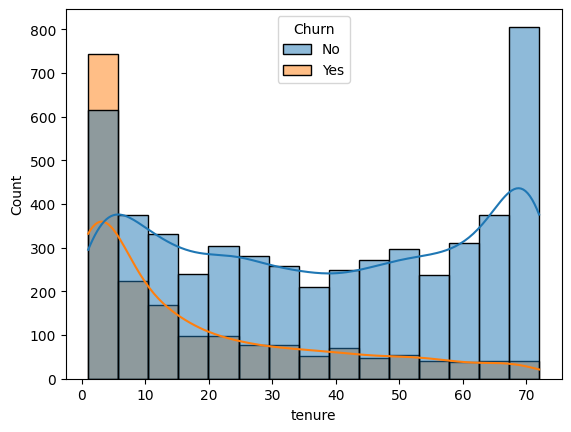

In [18]:
sns.histplot(x=df.tenure,hue=df.Churn,kde=True)

<Axes: xlabel='gender', ylabel='count'>

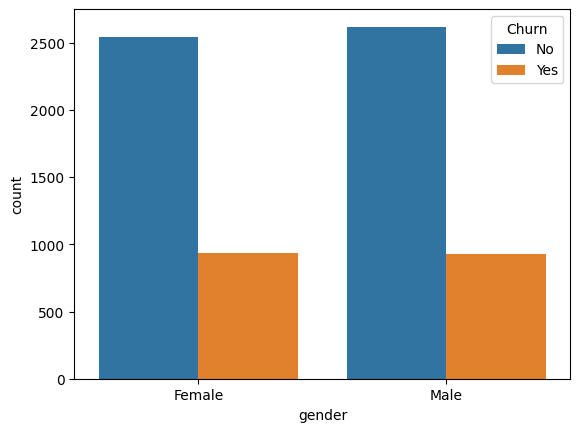

In [19]:
sns.countplot(data=df,x='gender',hue='Churn')

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='Contract'>

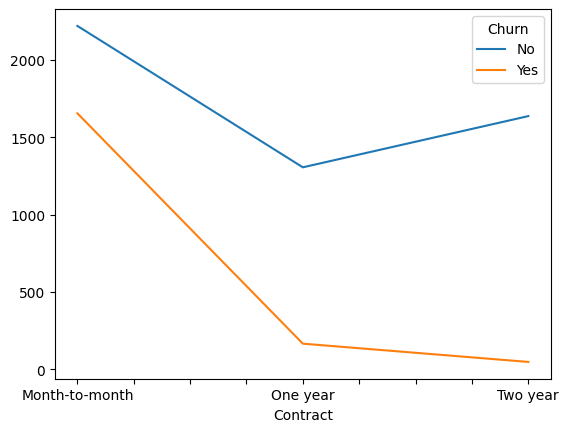

In [21]:
pd.crosstab(df.Contract,df.Churn).plot()

<Axes: xlabel='Contract'>

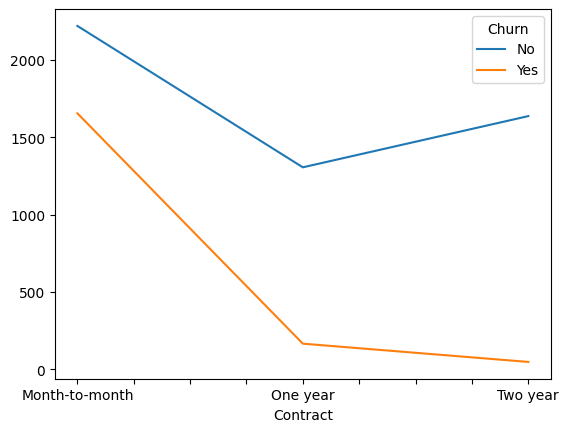

In [22]:
pd.crosstab(df.Contract,df.Churn).plot()

<Axes: xlabel='Churn', ylabel='Contract'>

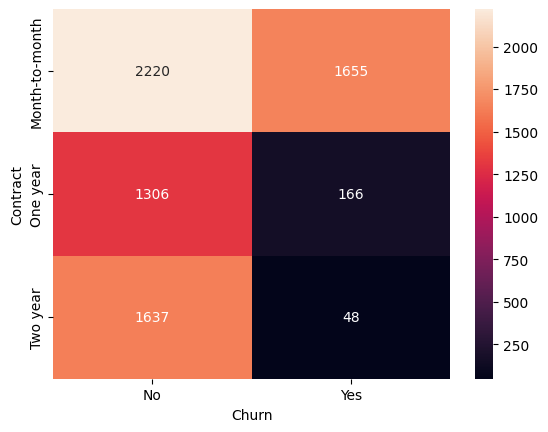

In [23]:
sns.heatmap(pd.crosstab(df.Contract,df.Churn),annot=True,fmt='g')

In [24]:
pd.crosstab(df.Churn,df.PaymentMethod)

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1284,1289,1294,1296
Yes,258,232,1071,308


### Preprocessing

In [25]:
df.replace('No internet service','No',inplace=True)

In [26]:
df.MultipleLines.value_counts()
df.replace('No phone service','No',inplace=True)

In [27]:
for i in df.columns:
    print(i,':',df[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [28]:
df.gender = df.gender.replace({'Male':1,'Female':0})

In [29]:
cat_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [30]:
df[cat_cols] = df[cat_cols].replace({'Yes':1,'No':0})

In [31]:
df = pd.get_dummies(df,drop_first=True,dtype='uint')

In [32]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']

In [34]:
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler
mn = MinMaxScaler()
df[num_cols] = mn.fit_transform(df[num_cols])

In [35]:
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
776,0,0,1,1,0.028169,0,0,0,1,0,...,0.219403,0.008505,0,0,0,0,0,0,0,1
3379,0,0,0,0,0.014085,1,0,0,0,0,...,0.010448,0.002954,0,0,1,0,0,0,0,1
5555,0,0,1,1,0.971831,1,0,0,0,0,...,0.015423,0.156929,0,0,1,0,1,0,0,0


### Modelling

In [36]:
X = df.drop('Churn',axis=1)
y = df.Churn

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [40]:
import keras
model = keras.Sequential()

In [41]:
X_train.shape

(5625, 23)

In [42]:
model.add(
keras.layers.Dense(30,input_shape=(23,),activation='relu'))
model.add(
keras.layers.Dense(10,activation='relu'))
model.add(
keras.layers.Dense(1,activation='sigmoid')
)

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                720       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1041 (4.07 KB)
Trainable params: 1041 (4.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
callbacks = keras.callbacks.EarlyStopping(min_delta=0.001,patience = 3)


In [47]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[ keras.metrics.BinaryAccuracy()])

In [48]:
model.fit(x=X_train,y=y_train,batch_size=120,epochs=60,callbacks=[callbacks],validation_data=(X_test,y_test))

Epoch 1/60
47/47 [==============================] - 2s 12ms/step - loss: 0.5917 - binary_accuracy: 0.6928 - val_loss: 0.5294 - val_binary_accuracy: 0.7235
Epoch 2/60
47/47 [==============================] - 0s 5ms/step - loss: 0.4821 - binary_accuracy: 0.7575 - val_loss: 0.4584 - val_binary_accuracy: 0.7811
Epoch 3/60
47/47 [==============================] - 0s 6ms/step - loss: 0.4420 - binary_accuracy: 0.7877 - val_loss: 0.4378 - val_binary_accuracy: 0.7875
Epoch 4/60
47/47 [==============================] - 0s 6ms/step - loss: 0.4315 - binary_accuracy: 0.7899 - val_loss: 0.4337 - val_binary_accuracy: 0.7974
Epoch 5/60
47/47 [==============================] - 0s 3ms/step - loss: 0.4270 - binary_accuracy: 0.7922 - val_loss: 0.4298 - val_binary_accuracy: 0.8045
Epoch 6/60
47/47 [==============================] - 0s 3ms/step - loss: 0.4239 - binary_accuracy: 0.7950 - val_loss: 0.4281 - val_binary_accuracy: 0.8045
Epoch 7/60
47/47 [==============================] - 0s 3ms/step - loss: 0.4

In [49]:
history = pd.DataFrame(model.history.history)

<Axes: >

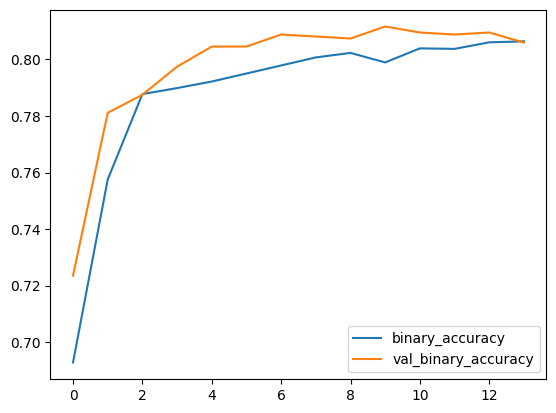

In [50]:
history[['binary_accuracy','val_binary_accuracy']].plot()

<Axes: >

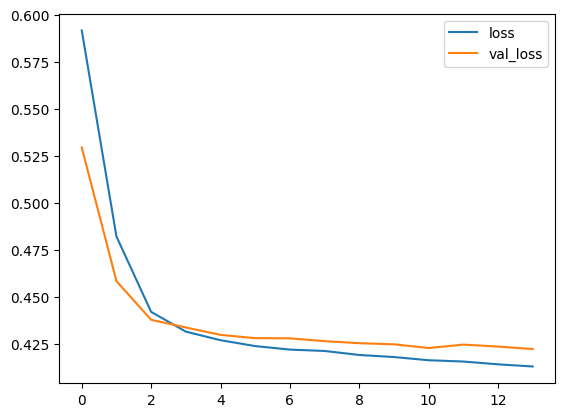

In [51]:
history[['loss','val_loss']].plot()

### Inferencing..

In [52]:
model.layers

In [53]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(23, 30) dtype=float32, numpy=
 array([[ 1.97177470e-01,  4.67629246e-02,  1.67610735e-01,
          8.21721926e-02, -1.79667532e-01, -1.31325185e-01,
         -1.79389626e-01,  2.48867333e-01, -1.07715808e-01,
         -5.90426102e-02, -1.35218158e-01,  2.16457188e-01,
         -9.14817862e-03, -7.95574263e-02, -7.72871897e-02,
          3.10364276e-01,  3.01197767e-01,  8.04644153e-02,
          2.96189457e-01, -2.51347721e-01,  2.67309770e-02,
         -2.51627505e-01, -6.41917661e-02, -2.17035621e-01,
          2.22797036e-01, -1.46313712e-01,  2.13191703e-01,
          2.34713301e-01,  1.12968914e-01, -1.05297133e-01],
        [-1.33319035e-01,  3.19451839e-01, -1.66867673e-01,
         -1.39025211e-01, -1.42815337e-01,  2.13206187e-01,
          2.61147588e-01, -2.65637517e-01, -2.57412285e-01,
         -9.91398841e-02, -1.43537030e-01,  3.53336424e-01,
         -9.04429406e-02, -1.62757039e-01,  1.60588905e-01,
          1.86610922e-01, -1.36

In [54]:
import numpy as np
y_pred = np.where(model.predict(X_test)>0.5,1,0).reshape(-1)

44/44 [==============================] - 0s 3ms/step


In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8059701492537313

In [59]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test,y_pred)) #since the dist of data along class 0 and 1 is not normal ( some errs occurs...!)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1018
           1       0.69      0.54      0.61       389

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



<Axes: >

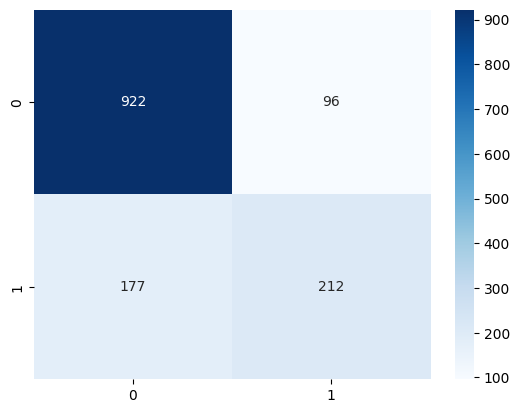

In [60]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g',cmap='Blues')